# 1. Business Problem

**1. What is the business problem that you are trying to solve?**
> - Given clinical parameters of a patient can the model predict whether or not they have heart disease ?
> - This dataset can be utilised for classification tasks. There are multiple classes of result ( Heart Diseases )
        0 = none
        1 = mild or moderate
        2 = moderate or severe
        3 = akinesis or dyskmem
        4 = critical
> - Also, identification of the relevent input variables which contribute to determine the classification class.

**2. What data do you need to answer the above problem?**
> Heart Disease cleveland sample Dataset with class label.
> #### Attribute Information:
> 1. age: age in years
> 2. sex: sex (1 = male; 0 = female)
> 3. cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
> 4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
> 5. chol: serum cholestoral in mg/dl
> 6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
> 7. restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
> 8. thalach: maximum heart rate achieved
> 9. exang: exercise induced angina (1 = yes; 0 = no)
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
> 12. ca: number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
> 14. restwm: rest wall (sp?) motion abnormality
        0 = none
        1 = mild or moderate
        2 = moderate or severe
        3 = akinesis or dyskmem (sp?)


**3. What are the different sources of data?**
>  Heart Disease cleveland Data Set in The UCI Machine Learning Repository - https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data


**4. What kind of analytics task are you performing?**
> This is a Predictive analytics task using classification technique to determine whether a person have heart disease with what symptom.

In [206]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import wget
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import sys

%matplotlib inline

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import plot_tree

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics



# 2. Data Acquisition
 
For the problem identified , find an appropriate data set (Your data set must 
be unique) from any public data source.

---



## 2.1 Download the data directly



In [2]:
##---------Type the code below this line------------------##

In [131]:

#-------- Download data files from https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/ ----------#
    
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

csv = wget.download(url, out='heart.data')

## 2.2 Code for converting the above downloaded data into a dataframe

In [5]:
##---------Type the code below this line------------------##

In [132]:
# The dataset does not have headers. Header can be extracted using the follwoing link.
# https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol',
       'fbs', 'restecg', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal', 'restwm']
heart_data = pd.read_csv(csv, names=column_names, skipinitialspace = True)

heart_data_copy = heart_data.copy()

## 2.3 Confirm the data has been downloaded correctly by displaying the first 5 and last 5 records.

In [7]:
##---------Type the code below this line------------------##

In [133]:
# Display first 5 records
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,restwm
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [134]:
# Display last 5 records
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,restwm
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [10]:
##---------Type the code below this line------------------##

In [135]:
# Column headings

heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'restwm'],
      dtype='object')

In [136]:
# Data description

heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  restwm    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [137]:
# statistical description for numeric attributes

heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,restwm
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [138]:
# Distribution of following categorical attributes in % across census dataset


print(round((heart_data['sex'].value_counts())/len(heart_data['sex'])*100, 2))
print(round((heart_data['cp'].value_counts())/len(heart_data['cp'])*100, 2))
print(round((heart_data['fbs'].value_counts())/len(heart_data['fbs'])*100, 2))
print(round((heart_data['restecg'].value_counts())/len(heart_data['restecg'])*100, 2))
print(round((heart_data['exang'].value_counts())/len(heart_data['exang'])*100, 2))
print(round((heart_data['slope'].value_counts())/len(heart_data['slope'])*100, 2))
print(round((heart_data['ca'].value_counts())/len(heart_data['ca'])*100, 2))
print(round((heart_data['thal'].value_counts())/len(heart_data['thal'])*100, 2))
print(round((heart_data['restwm'].value_counts())/len(heart_data['restwm'])*100, 2))


1.0    67.99
0.0    32.01
Name: sex, dtype: float64
4.0    47.52
3.0    28.38
2.0    16.50
1.0     7.59
Name: cp, dtype: float64
0.0    85.15
1.0    14.85
Name: fbs, dtype: float64
0.0    49.83
2.0    48.84
1.0     1.32
Name: restecg, dtype: float64
0.0    67.33
1.0    32.67
Name: exang, dtype: float64
1.0    46.86
2.0    46.20
3.0     6.93
Name: slope, dtype: float64
0.0    58.09
1.0    21.45
2.0    12.54
3.0     6.60
?       1.32
Name: ca, dtype: float64
3.0    54.79
7.0    38.61
6.0     5.94
?       0.66
Name: thal, dtype: float64
0    54.13
1    18.15
2    11.88
3    11.55
4     4.29
Name: restwm, dtype: float64


## 2.5  Observations from the above. 
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?

Score: 2 Marks in total (0.25 marks for 2.1, 0.25 marks for 2.2, 0.5 marks for 2.3, 0.25 marks for 2.4, 0.75 marks for 2.5)

In [139]:
# 1. Size of the dataset

print("Total record, Total Attribute")
heart_data.shape



Total record, Total Attribute


(303, 14)

In [186]:
# 2. What type of data attributes are there?

print(heart_data.dtypes)

print("Numeric attributes: ['age', 'trestbps', 'chol', 'thalach',  'oldpeak'] ") 

print("Categorical attributes: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'slope', 'thal', restwm'] ")

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
restwm        int64
dtype: object
Numeric attributes: ['age', 'trestbps', 'chol', 'thalach',  'oldpeak'] 
Categorical attributes: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'slope', 'thal', restwm'] 


In [141]:
# 3. Is there any NULL data that has to be cleaned?

print("Total number of null records in each column:")
display(heart_data.isnull().sum())


Total number of null records in each column:


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
restwm      0
dtype: int64

In [18]:
# There is no NULL records in the dataframe

# 3. Data Preparation

## 3.1 Check for 

* duplicate data
* missing data
* data inconsistencies


In [19]:
##---------Type the code below this line------------------##

In [142]:
# Duplicate data check

duplicate = heart_data[heart_data.duplicated()]

print("Number of duplicate records: ", len(duplicate))

Number of duplicate records:  0


In [143]:
# Check for redundant attributes

print(heart_data.nunique())

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
restwm        5
dtype: int64


In [144]:
# Missing data check

# For categorical attributes

print("% of missing data in thal: ", round(len(heart_data.loc[heart_data['thal'] == '?'])/len(heart_data)*100, 2))
print("% of missing data in ca: ", round(len(heart_data.loc[heart_data['ca'] == '?'])/len(heart_data)*100, 2))
print("Column wise total number of records with '?' ")
print(heart_data.isin(['?']).sum())


# For numeric attributes, there is no missing value


% of missing data in thal:  0.66
% of missing data in ca:  1.32
Column wise total number of records with '?' 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
restwm      0
dtype: int64


In [145]:
# Data inconsistencies

# Check for numeric attributes

heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,restwm
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


<font color='Orange'>Observation - None of the numeric attributes has inconsistencies. </font>

## 3.2 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


In [26]:
##---------Type the code below this line------------------##

In [146]:
# Remove duplicates

heart_data = heart_data.drop_duplicates(keep='first')
heart_data_copy = heart_data_copy.drop_duplicates(keep='first')

print("Total number of records after removing duplicates:", heart_data.shape[0])
print("Total number of attributes after removing duplicates:", heart_data.shape[1])

Total number of records after removing duplicates: 303
Total number of attributes after removing duplicates: 14


In [147]:
# to impute or remove missing data
# Remove records with "?"

heart_data = heart_data.replace('?' , np.NaN)
heart_data.dropna(inplace = True)

print("Total number of records after removing missing data:", heart_data.shape[0])
print("Total number of attributes after removing missing data:", heart_data.shape[1])

Total number of records after removing missing data: 297
Total number of attributes after removing missing data: 14


In [149]:
# to remove data inconsistencies

print("As there are no as inconsistency we don't have to apply this step")



As there are no as inconsistency we don't have to apply this step


## 3.3 Encode categorical data

In [31]:
##---------Type the code below this line------------------##

#### <font color='blue'> All categorical attributes are already in Lebel Encoded </font>



## 3.4 Text data

1. Remove special characters
2. Change the case (up-casing and down-casing).
3. Tokenization — process of discretizing words within a document.
4. Filter Stop Words.

In [38]:
##---------Type the code below this line------------------##

In [39]:
##---------Type the code below this line------------------##

## 3.4 Report

Mention and justify the method adopted 
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 

OR for textdata
* How many tokens after step 3?
* how may tokens after stop words filtering?

If the any of the above are not present, then also add in the report below.

Score: 2 Marks (based on the dataset you have, the data prepreation you had to do and report typed, marks will be distributed between 3.1, 3.2, 3.3 and 3.4)

In [40]:
##---------Type the code below this line------------------##

#### to remove duplicate data, if present 

- in the original dataframe, there were 6 duplicate records. Removed all of it (kept only first record) using remove_duplicates method in df.


#### to impute or remove missing data, if present

- There were missing data marked as "?" in thal (0.66%) and ca (1.32%). Dropped all missing data as the volume of missing is significantly less.

- % of missing data in thal:  0.66
- % of missing data in ca:  1.32



#### to remove data inconsistencies, if present

- As the Data set haven't as such inconsistency inn any numeric field this step not required

In [41]:
##---------Type the code below this line------------------##

## 3.5 Identify the target variables.

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations

Score: 1 Mark

In [42]:
##---------Type the code below this line------------------##

In [207]:
# Separating Features and Target

X = heart_data.drop(['restwm'], axis=1)
y = heart_data.loc[:,['restwm']]

print(X.shape)
print(y.shape)

(297, 13)
(297, 1)


In [208]:
#### Checking target variable class distribution

display(heart_data[['restwm']].value_counts())
display(round(heart_data[['restwm']].value_counts()/len(heart_data)*100))


num_zero = (y == 0).sum()
num_ones = (y == 1).sum()

print(num_zero)
print(num_ones)

restwm
0         160
1          54
2          35
3          35
4          13
dtype: int64

restwm
0         54.0
1         18.0
2         12.0
3         12.0
4          4.0
dtype: float64

restwm    160
dtype: int64
restwm    54
dtype: int64


#### Observations

- Target variable restwm have 5 different classes of sysmptoms 
- 0         54.0
- 1         18.0
- 2         12.0
- 3         12.0
- 4          4.0

# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.

Score: 1 Mark

In [47]:
##---------Type the code below this line------------------##

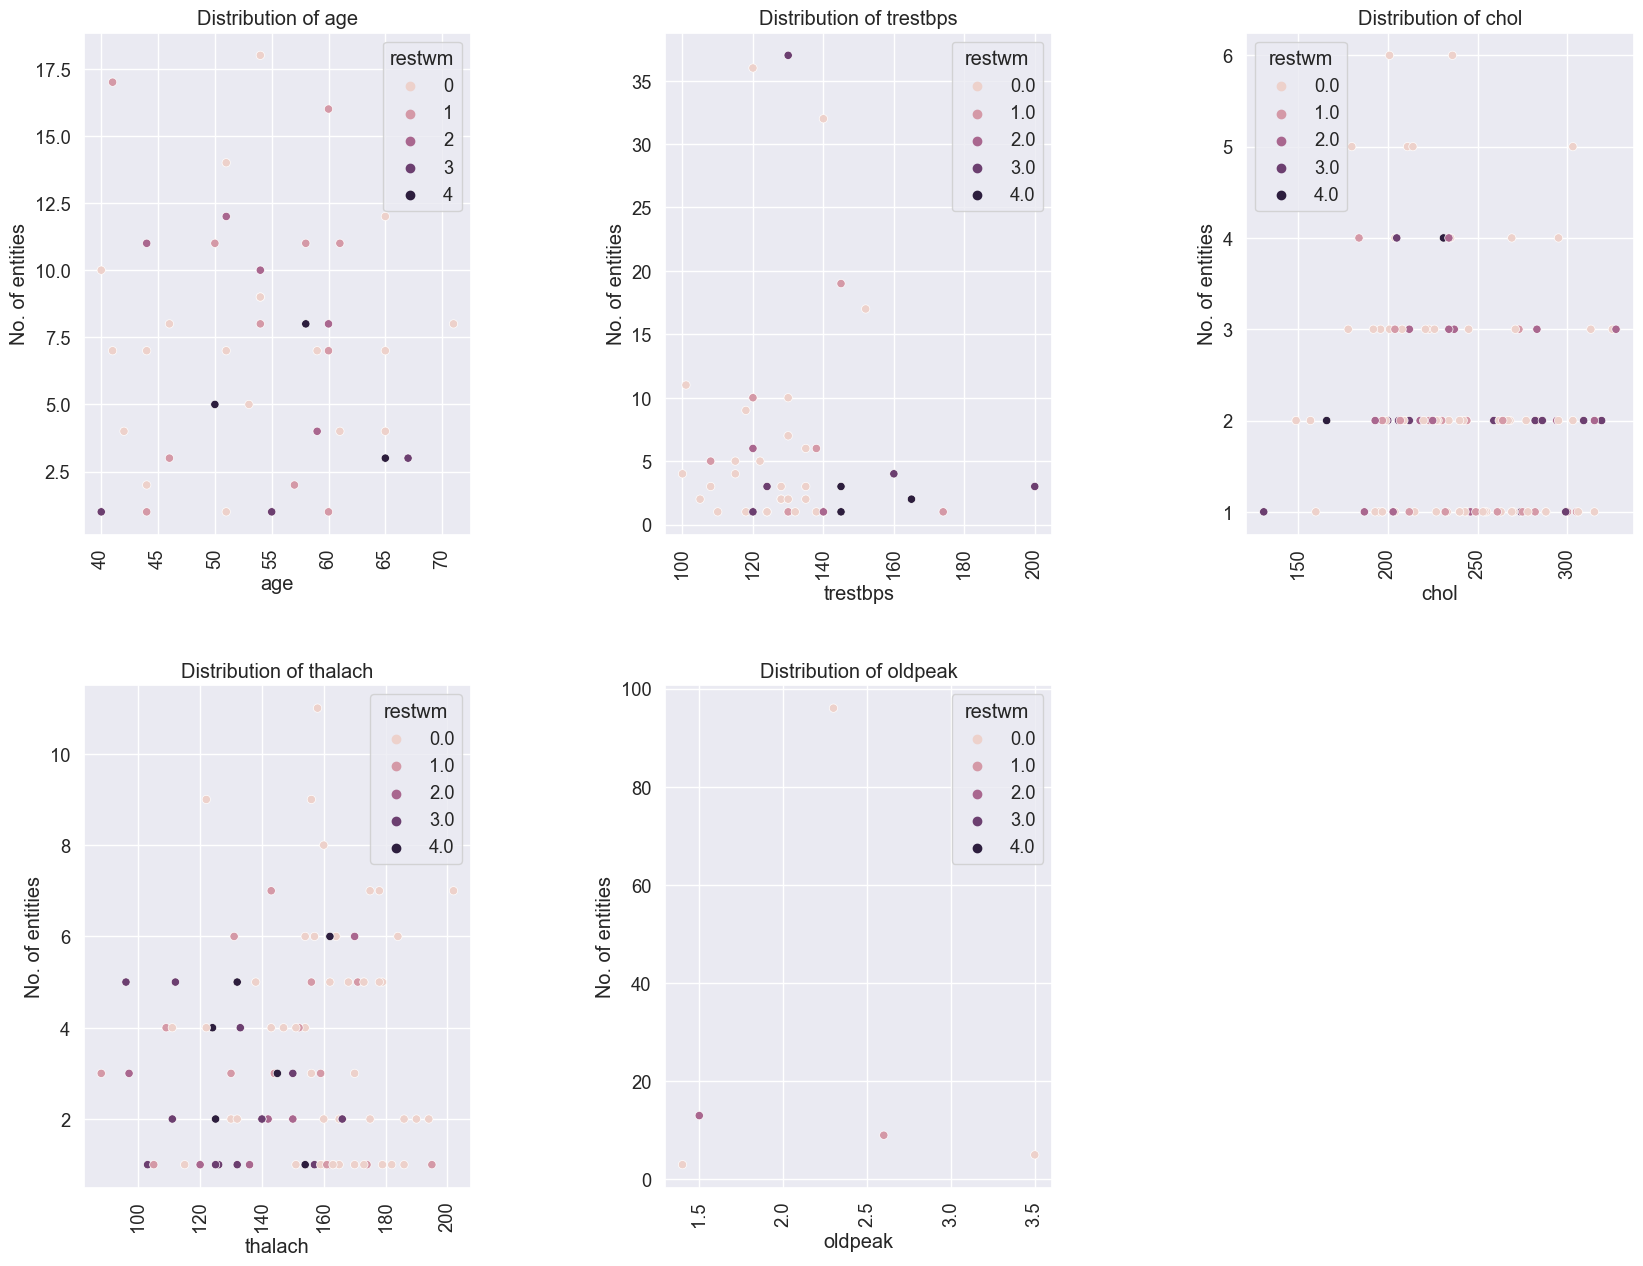

In [154]:

plt.figure(figsize = (20, 15))
sns.set(font_scale=1.2)

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5) 
plt.subplot(2,3, 1)
sns.scatterplot(data=heart_data,x="age", y=heart_data['age'].value_counts(), hue='restwm')
plt.title("Distribution of age")
plt.xlabel("age")
plt.ylabel("No. of entities")
plt.xticks(rotation = 90);

plt.subplot(2,3, 2)
sns.scatterplot(data=heart_data,x="trestbps", y=heart_data['trestbps'].value_counts(), hue='restwm')
plt.title("Distribution of trestbps")
plt.xlabel("trestbps")
plt.ylabel("No. of entities")
plt.xticks(rotation = 90);

plt.subplot(2,3, 3)
sns.scatterplot(data=heart_data,x="chol", y=heart_data['chol'].value_counts(), hue='restwm')
plt.title("Distribution of chol")
plt.xlabel("chol")
plt.ylabel("No. of entities")
plt.xticks(rotation = 90);

plt.subplot(2,3, 4)
sns.scatterplot(data=heart_data,x="thalach", y=heart_data['thalach'].value_counts(), hue='restwm')
plt.title("Distribution of thalach")
plt.xlabel("thalach")
plt.ylabel("No. of entities")
plt.xticks(rotation = 90);

plt.subplot(2,3, 5)
sns.scatterplot(data=heart_data,x="oldpeak", y=heart_data['oldpeak'].value_counts(), hue='restwm')
plt.title("Distribution of oldpeak")
plt.xlabel("oldpeak")
plt.ylabel("No. of entities")
plt.xticks(rotation = 90);


#### Checking outliers

Text(0.5, 1.0, 'Distribution of oldpeak')

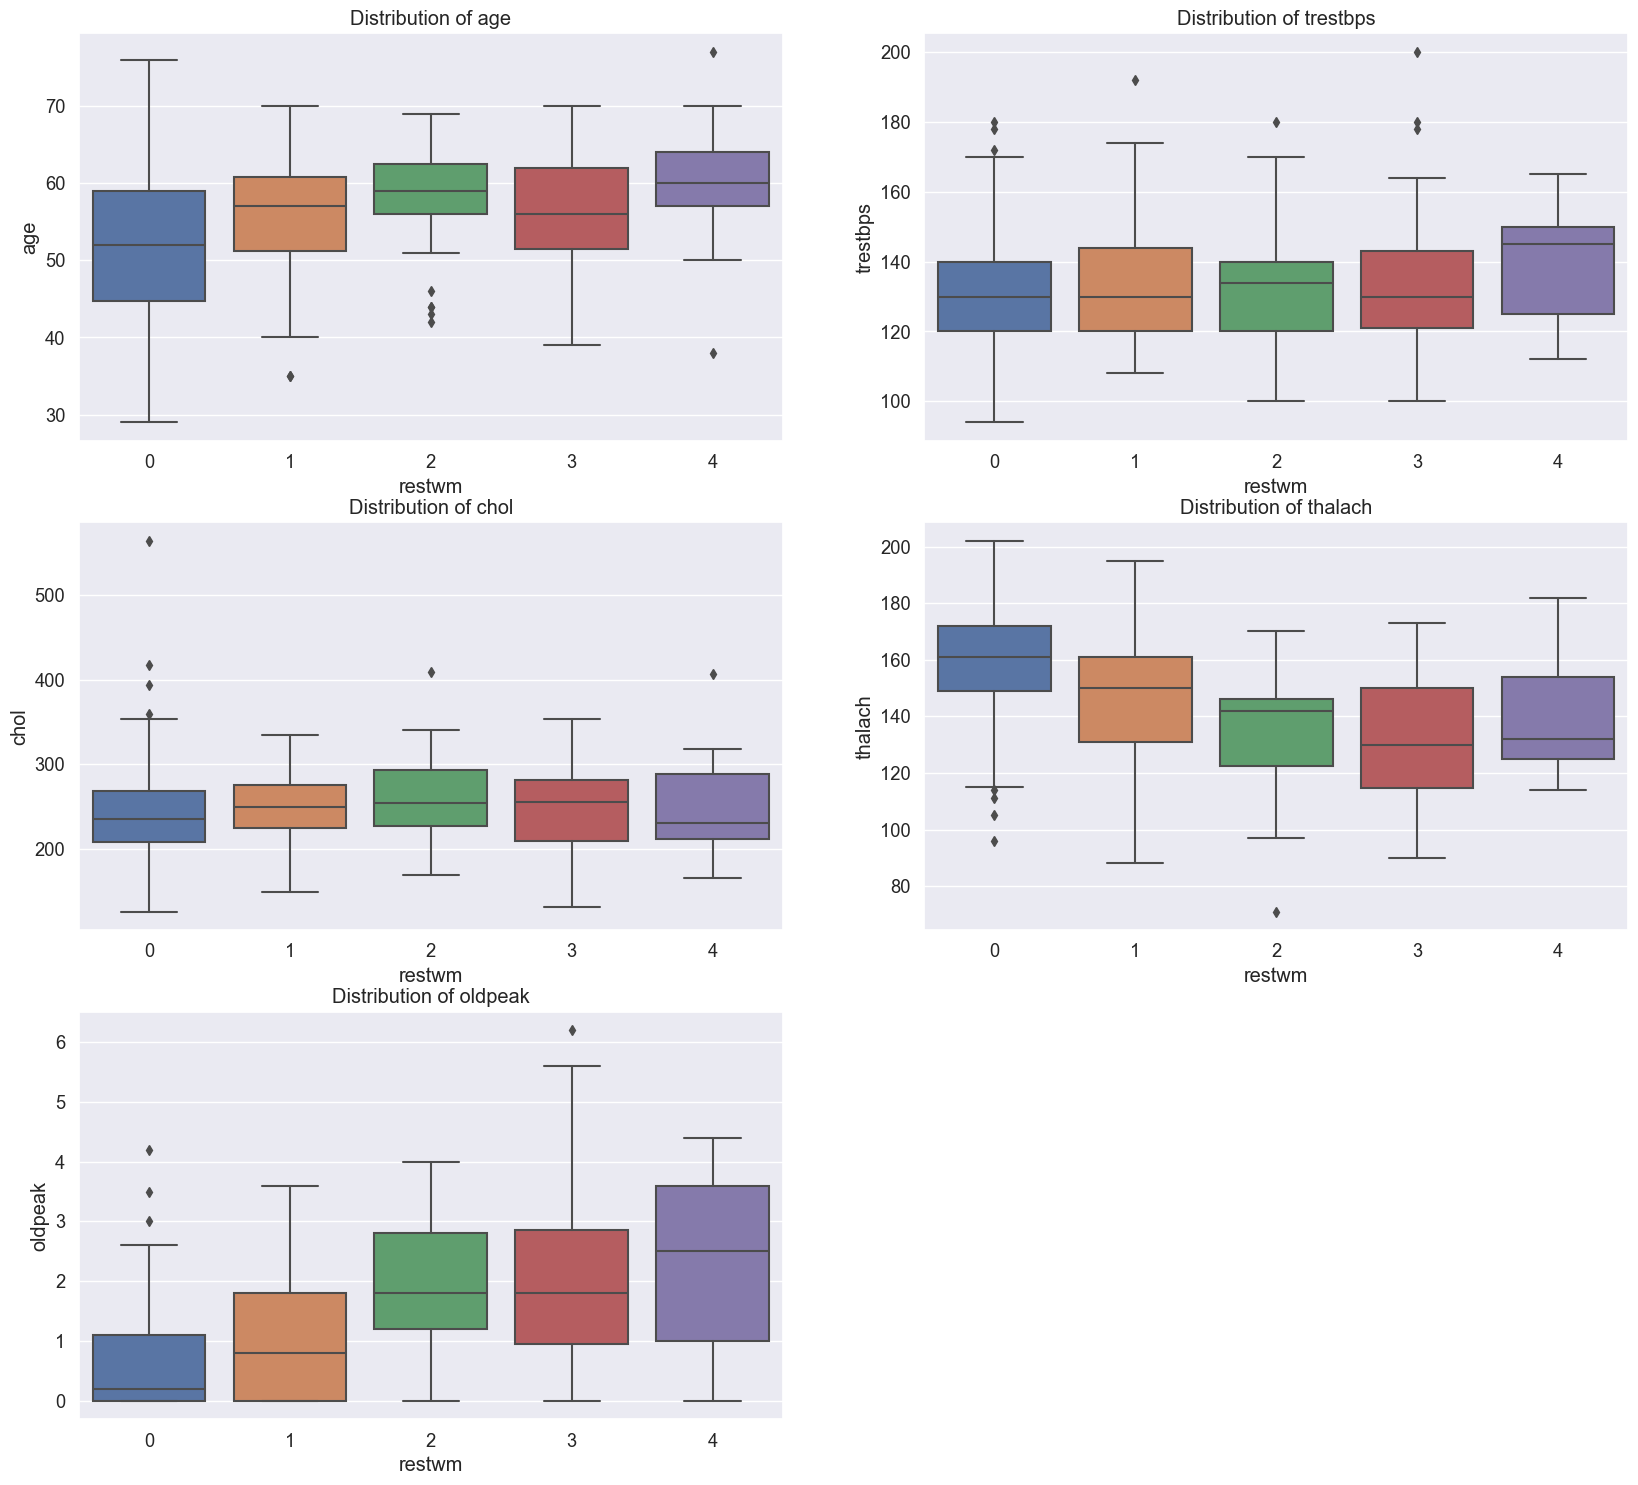

In [155]:
plt.figure(figsize = (20, 18))

plt.subplot(3,2, 1)
sns.boxplot(data=heart_data, y="age", x="restwm")
plt.title("Distribution of age")

plt.subplot(3,2, 2)
sns.boxplot(data=heart_data, y="trestbps", x="restwm")
plt.title("Distribution of trestbps")

plt.subplot(3,2, 3)
sns.boxplot(data=heart_data, y="chol", x="restwm")
plt.title("Distribution of chol")

plt.subplot(3,2, 4)
sns.boxplot(data=heart_data, y="thalach", x="restwm")
plt.title("Distribution of thalach")

plt.subplot(3,2, 5)
sns.boxplot(data=heart_data, y="oldpeak", x="restwm")
plt.title("Distribution of oldpeak")


## 4.2 EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification. 
* Name them, explain why you think they can be helpful in the task and perform the plot as well. Unless proper justification for the choice of plots given, no credit will be awarded.

Score: 2 Marks

In [50]:
##---------Type the code below this line------------------##

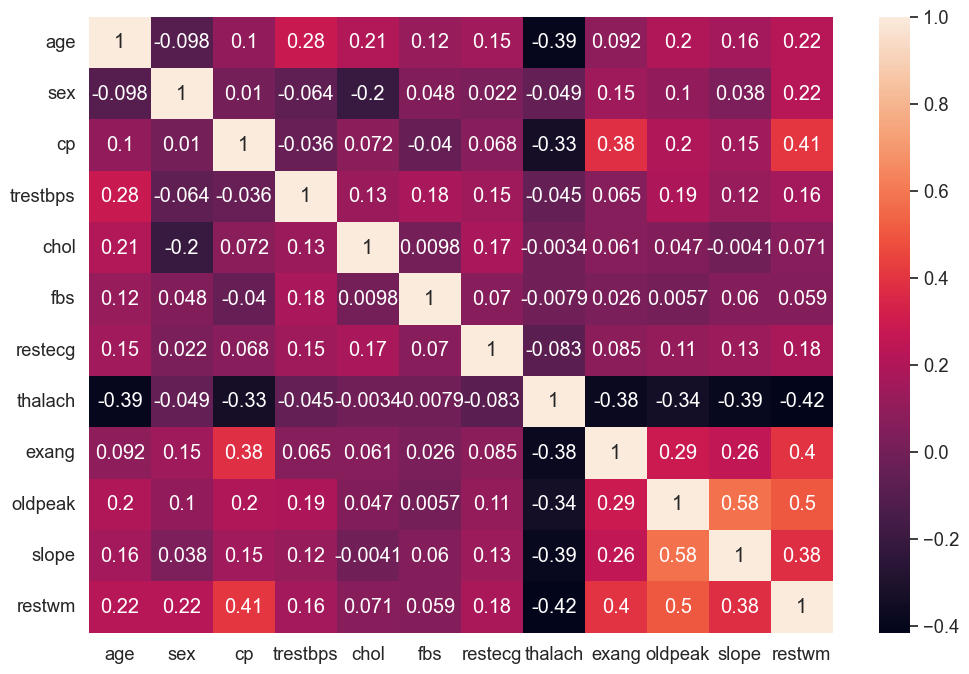

In [156]:
#Correlation heatmap on original data

plt.figure(figsize = [12,8])
sns.heatmap(heart_data_copy.corr(), annot=True)
plt.show()

#### Observation: None of the attributes are highly correlated. 

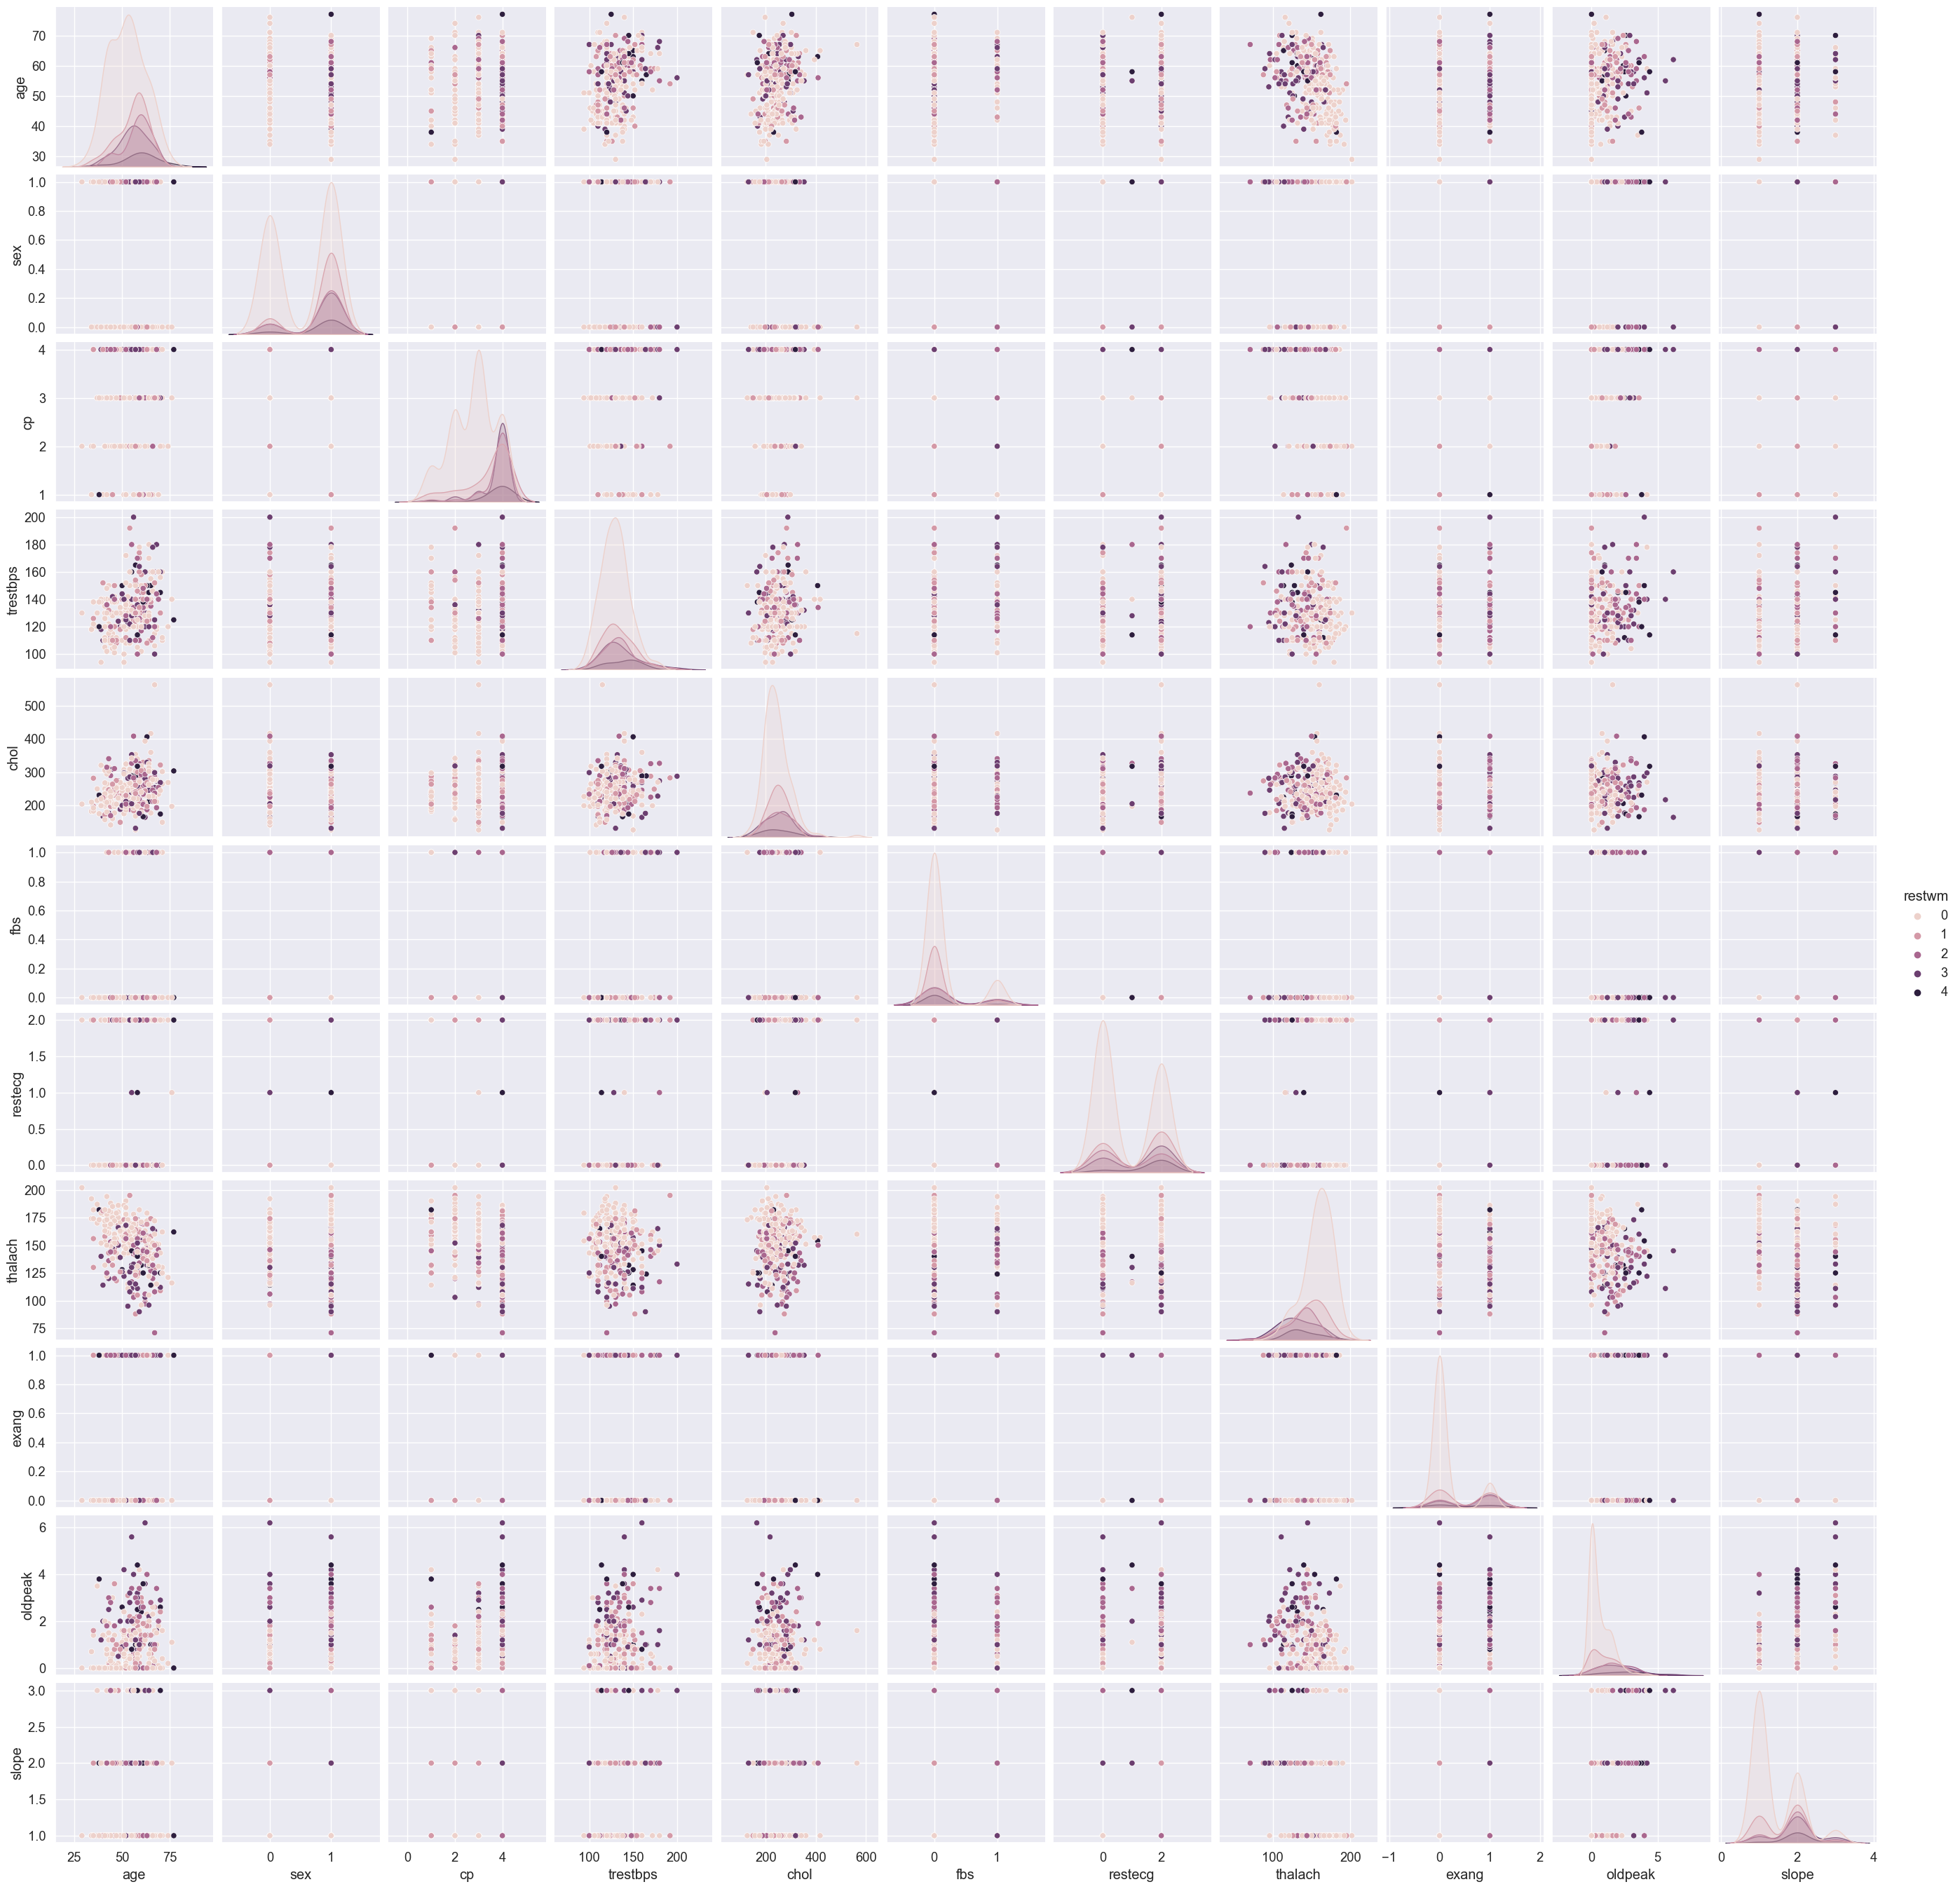

In [157]:
sns.pairplot(data=heart_data_copy, hue="restwm")

#### Checking distribution of age and restwm to understand age groups better

In [158]:
def age_group(x):
    x = int(x)
    if( 0 < x < 31 ):
        return "<=30"
    if( 30 < x < 51 ):
        return "31-50"
    if( 50 < x < 71 ):
        return "51-70"
    else:
        return ">70"

heart_data_copy['age_group'] = heart_data_copy['age'].apply(age_group)

Text(0.5, 1.0, 'Income of Individuals of Different Age Groups')

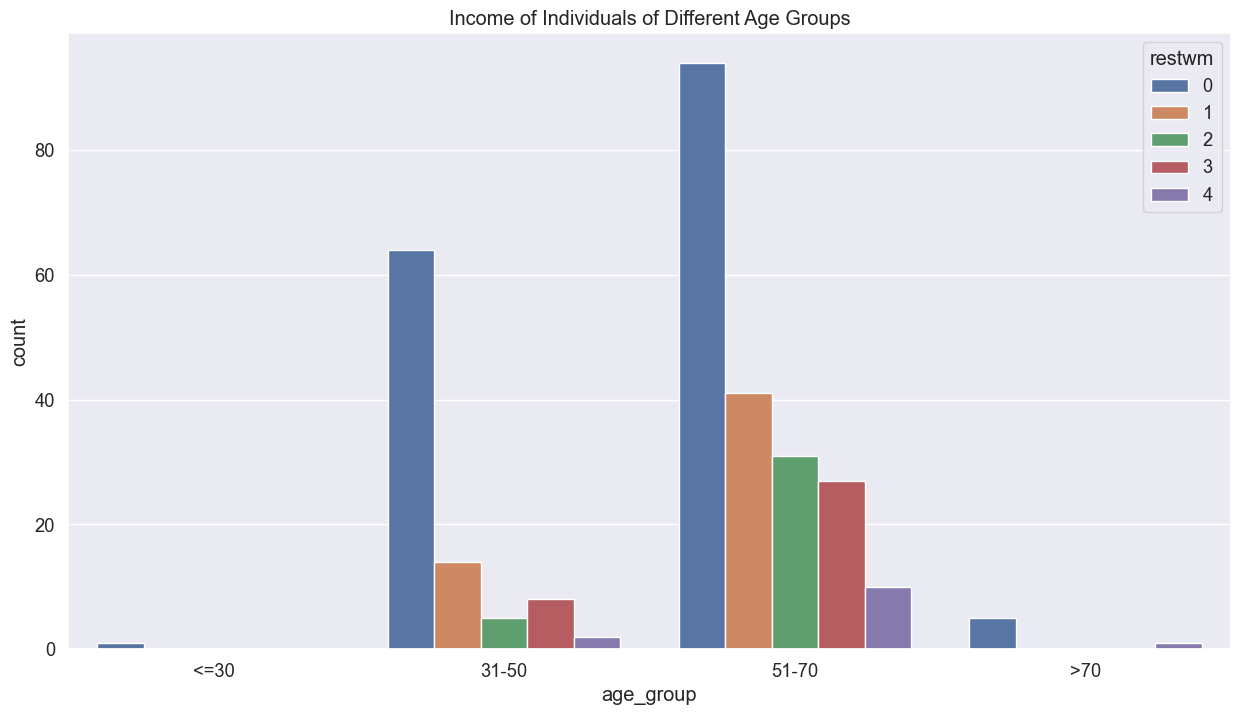

In [127]:
plt.figure(figsize=(15,8))
order_list = ['<=30', '31-50', '51-70', '>70']
sns.countplot(heart_data_copy['age_group'], hue = heart_data_copy['restwm'], order = order_list)
plt.title('Income of Individuals of Different Age Groups')

### Observations:

1. Individual with higher age level tends to become more heart diseases prone.
2. Individual with all age group can have severe symptom.
3. Age group between 51-70 has higher number of individuals with severe symptom. 
4. Age is not as such correlevent to result. 

# 5. Data Wrangling



## 5.1 Univariate Filters 

#### Numerical and Categorical Data
* Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>two</b>) 

#### For Text data

1. Stemming / Lemmatization.
2. Forming n-grams and storing them in the document vector.
3. TF-IDF
(From the above 2 you are required to use only any <b>two</b>)


Score: 3 Marks

In [65]:
##---------Type the code below this line------------------##

### Mutual information (Information gain)

In [159]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [160]:
for i in range(0, len(X.columns)):
    print(i, X.columns[i])

0 age
1 sex
2 cp
3 trestbps
4 chol
5 fbs
6 restecg
7 thalach
8 exang
9 oldpeak
10 slope
11 ca
12 thal


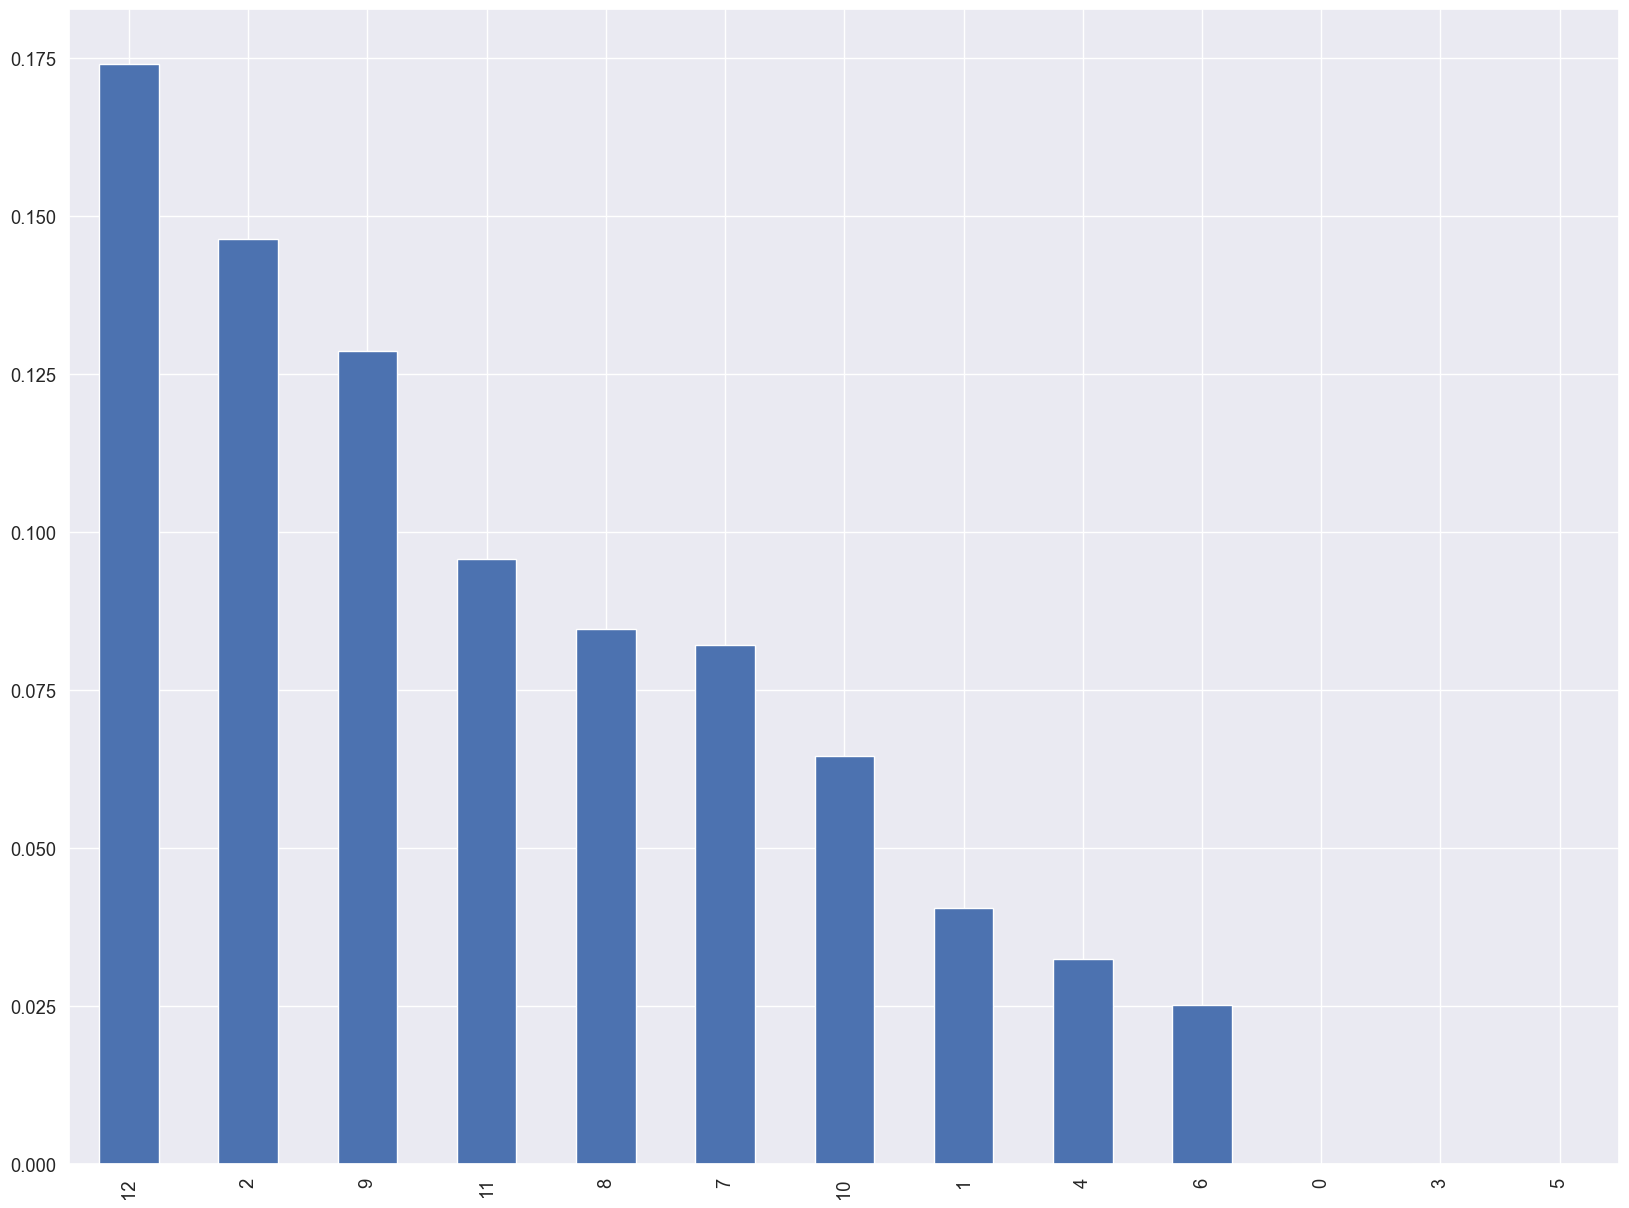

In [161]:
importances = mutual_info_classif(X,y.values.ravel())
feat_importances = pd.Series(importances)
feat_importances = feat_importances.sort_values(ascending=False)
plt.figure(figsize = [20,15])
feat_importances.plot(kind='bar')
plt.xticks(rotation = 90);
plt.show()

#### Top 10 features from Information Gain

1. ca
2. cp
3. thal
4. oldpeak
5. slope
6. thalach
7. exang
8. chol
9. age
10. restecg

### Chi-Squared test

In [162]:
selector = SelectKBest(chi2, k=10)
selector.fit_transform(X, y)

col_index = selector.get_support(indices=True)

X_chi = X.iloc[:, col_index]
X_chi.head()


,age,cp,trestbps,chol,restecg,thalach,exang,oldpeak,ca,thal
0,63.0,1.0,145.0,233.0,2.0,150.0,0.0,2.3,0.0,6.0
1,67.0,4.0,160.0,286.0,2.0,108.0,1.0,1.5,3.0,3.0
2,67.0,4.0,120.0,229.0,2.0,129.0,1.0,2.6,2.0,7.0
3,37.0,3.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,3.0
4,41.0,2.0,130.0,204.0,2.0,172.0,0.0,1.4,0.0,3.0


## 5.2 Report observations

Write your observations from the results of each method. Clearly justify your choice of the method.

Score 1 mark

In [70]:
##---------Type the code below this line------------------##

We have selected Top 10 features using Information Gain and Chi-Squared test.
Top 5 common features are selected from the list.

In [163]:
# Create df with Top 5 features.


X = X[['thal', 'cp','oldpeak','ca', 'exang']]

X.head()

,thal,cp,oldpeak,ca,exang
0,6.0,1.0,2.3,0.0,0.0
1,3.0,4.0,1.5,3.0,1.0
2,7.0,4.0,2.6,2.0,1.0
3,3.0,3.0,3.5,0.0,0.0
4,3.0,2.0,1.4,0.0,0.0


In [164]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,thal,cp,oldpeak,ca,exang
277,3.0,3.0,0.0,0.0,0.0
262,3.0,1.0,0.9,0.0,0.0
30,3.0,1.0,1.8,2.0,0.0
22,3.0,2.0,1.8,0.0,0.0
281,3.0,3.0,0.0,0.0,0.0


# 6. Implement Machine Learning Techniques

Use any 2 ML algorithms
1. Classification -- Decision Tree classifier 

2. Clustering -- kmeans

3. Association Analysis

4. Anomaly detection

5. Textual data -- Naive Bayes classifier (not taught in this course)

A clear justification have to be given for why a certain algorithm was chosen to address your problem.

Score: 4 Marks (2 marks each for each algorithm)

## 6.1 ML technique 1 + Justification

In [73]:
##---------Type the code below this line------------------##


### Decision Tree Classifier

#### Justification:

Decision trees are extremely useful for supervised machine learning problems because they break down complex data into more manageable parts. They’re mostly used for prediction analysis and data classification.

In [200]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt, recall_dt, f1_score_dt, support_dt = precision_recall_fscore_support(y_test, y_pred_dt, average='macro')


Decision Tree


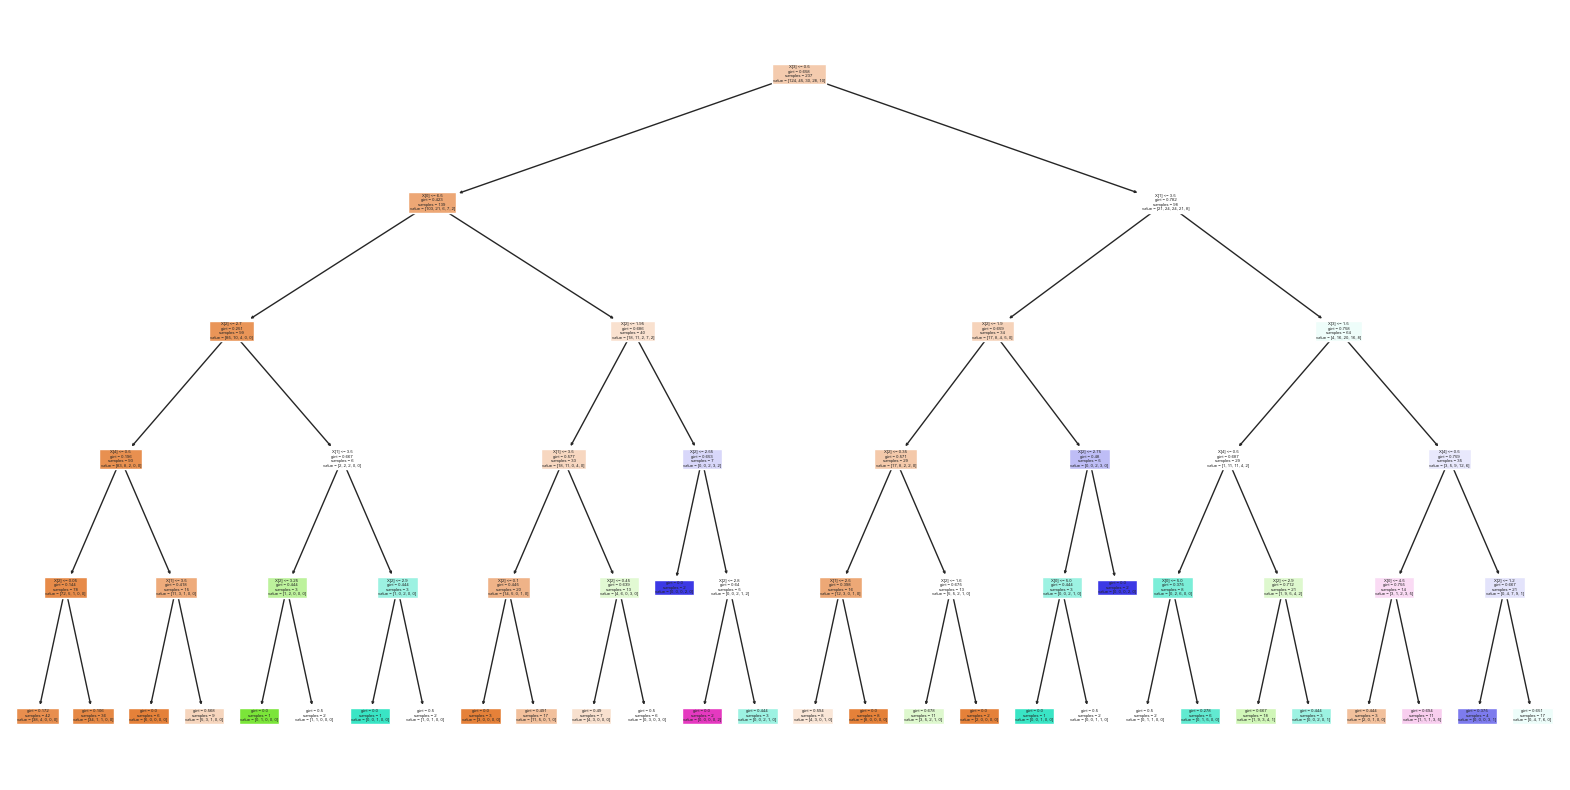

In [201]:
print('Decision Tree')
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True)
plt.show()

## 6.2 ML technique 2 + Justification

In [76]:
##---------Type the code below this line------------------##

### Naive Bayes Classifier

#### Justification:

Gaussian Naive Bayes is a classification technique used in Machine Learning based on the probabilistic approach and Gaussian distribution. This makes the assumption that the predictors contribute equally and independently to selecting the output class. 

In [202]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [203]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb, recall_nb, f1_score_nb, support_nb = precision_recall_fscore_support(y_test, y_pred_nb, average='macro')


## 7. Conclusion 

Compare the performance of the ML techniques used.

Derive values for preformance study metrics like accuracy, precision, recall, F1 Score, AUC-ROC etc to compare the ML algos and plot them. A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, Word cloud etc as per the requirement of your application/problem.

Score 1 Mark

In [79]:
##---------Type the code below this line------------------##

In [204]:
print('Decision Tree')
print('Accuracy:', accuracy_dt)
print('\nClassification Report:')
print(classification_report(y_test, y_pred_dt))

confusion = metrics.confusion_matrix(y_train, dt.predict(X_train) )
print('Confusion Matrix:')
display(confusion)

Decision Tree
Accuracy: 0.55

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        36
           1       0.20      0.33      0.25         9
           2       0.17      0.20      0.18         5
           3       1.00      0.14      0.25         7
           4       0.00      0.00      0.00         3

    accuracy                           0.55        60
   macro avg       0.44      0.29      0.30        60
weighted avg       0.65      0.55      0.56        60

Confusion Matrix:


array([[119,   4,   0,   0,   1],
       [ 20,  19,   5,   0,   1],
       [  4,   6,  19,   0,   1],
       [  2,   8,   8,   7,   3],
       [  0,   1,   1,   1,   7]], dtype=int64)

In [205]:
print('Naive Bayes')
print('Accuracy:', accuracy_nb)
print('\nClassification Report:')
print(classification_report(y_test, y_pred_nb))

confusion = metrics.confusion_matrix(y_train, nb.predict(X_train) )
print('Confusion Matrix:')
display(confusion)

Naive Bayes
Accuracy: 0.48333333333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.78      0.86        36
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         7
           4       0.04      0.33      0.07         3

    accuracy                           0.48        60
   macro avg       0.20      0.22      0.19        60
weighted avg       0.58      0.48      0.52        60

Confusion Matrix:


array([[84,  6,  0,  1, 33],
       [16,  3,  0,  0, 26],
       [ 1,  2,  0,  1, 26],
       [ 2,  1,  0,  3, 22],
       [ 0,  0,  0,  0, 10]], dtype=int64)

**<font color=blue> From the above metrics, we should select Decision Tree Classiefier for the chosen problem statement due to better accuracy of 56% compared to Naive Bayes Classifier </font>**

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

--------------Type the answers below this line--------------

**This is a Predictive analytics task using classification technique to determine whether a person have heart diseases or not with respect to specific symptom **


- To solve the business problem, we have chosed 2 classification techniques, Decision Tree and Naive Bayes Claasifiers.
- First step was to extract and store data in a dataframe.
- Next, we have performed Exploratory Data Analysis (EDA) to understand the attributes.
- Performed data cleansing
- Identified Predictors and Target variables
- Performed Feature scaling and Encoding
- Split data into Train and Test
- Applied 2 ML techniques
- Compared output and selected the best-fit model based on higher Accuracy.

**Challenges:**

- Selection of the dataset and identify business problem.
- Data pre-processing
- Dropping Correlated features
- Selection of ML techniques
